### Exercise 3 of Data Mining class

#### João Pedro Moreto Lourenção

#### Parte A - Classificação - Árvores de Decisão

2.A - O dataset Soybean se refere ao diagnóstico de 19 doenças comuns da soja. Ele
tem 35 atributos e 683 instâncias. Faça o pré-processamento necessário para
upload no Orange.

In [2]:
# Removing all lines with '%' from soybean.csv file
import pandas as pd

def load_and_clean_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    clean_lines = [line for line in lines if '%' not in line]

    with open('soybean_temp.csv', 'w') as file:
        file.writelines(clean_lines)

    df = pd.read_csv('soybean_temp.csv')

    return df

df = load_and_clean_csv('soybean.csv')

print(df.head())

df.to_csv('soybean_cleaned.csv', index=False)


      date  plant-stand    precip   temp  hail          crop-hist  \
0  october       normal   gt-norm   norm   yes        same-lst-yr   
1   august       normal   gt-norm   norm   yes   same-lst-two-yrs   
2     july       normal   gt-norm   norm   yes        same-lst-yr   
3     july       normal   gt-norm   norm   yes        same-lst-yr   
4  october       normal   gt-norm   norm   yes   same-lst-two-yrs   

   area-damaged     severity    seed-tmt  germination  ...  sclerotia  \
0     low-areas   pot-severe        none       90-100  ...     absent   
1     scattered       severe   fungicide        80-89  ...     absent   
2     scattered       severe   fungicide        lt-80  ...     absent   
3     scattered       severe        none        80-89  ...     absent   
4     scattered   pot-severe        none        lt-80  ...     absent   

   fruit-pods  fruit spots   seed  mold-growth  seed-discolor  seed-size  \
0        norm          dna   norm       absent         absent       no

2.B - Utilizando as ferramentas de visualização de dados, o que é possível
preliminarmente inferir preliminarmente sobre os atributos deste dataset?

41% das classes apresentam lesão de cancro. 46,8% das classes não se aplicam a lesão de cancro. 9% apresenta valor tan e 5,5% não apresentam valor para lesão de cancro. Existe 9,5% de missing data. A maioria das lesões de cancro são do tipo 'dna'. Além disso, tivemos um bom índice de precipitação durante o período descrito no dataset. 

2.C - Selecione a coluna “class” como o alvo da classificação, sendo as demais colunas
os atributos previsores. Use validação cruzada estratificada de 5-folds para o
treinamento de uma Árvore de Decisão com os parâmetros default. Anote o
tamanho da árvore obtida (número total de nós, profundidade e número de
nós-folhas) e as medidas de qualidade (acurácia, precision, recall e F1 score).
Justifique qual a medida de qualidade adequada para este caso.

Árvore com 114 nós, 9 níveis de profundidade e 71 folhas.

|       AUC         |            CA         |           F1         |        Prec        |         Recall        |           MCC|
|-------------------|----------------------|----------------------|-------------------|------------------------|-------------------|
|0.9583989414955372 |	0.8228404099560761 |	0.792198182003173 |	0.7807385611921919 |	0.8228404099560761 |	0.8068468499867862|

Recall é a métrica mais importante, pois deseja-se garantir que a maioria dos casos de doença sejam identificados. Porém, o F1 Score também é crucial, pois leva em conta tanto a precisão quanto o recall, fornecendo uma visão equilibrada do desempenho do modelo.

2.D - Mostre a matriz de confusão gerada pelo treinamento/teste da árvore de decisão.
Identifique nesta árvore quais foram as classes que tiveram 100% e 0% de acerto,
respectivamente. Justifique este comportamento (em especial para as classes
com 0% de acerto).


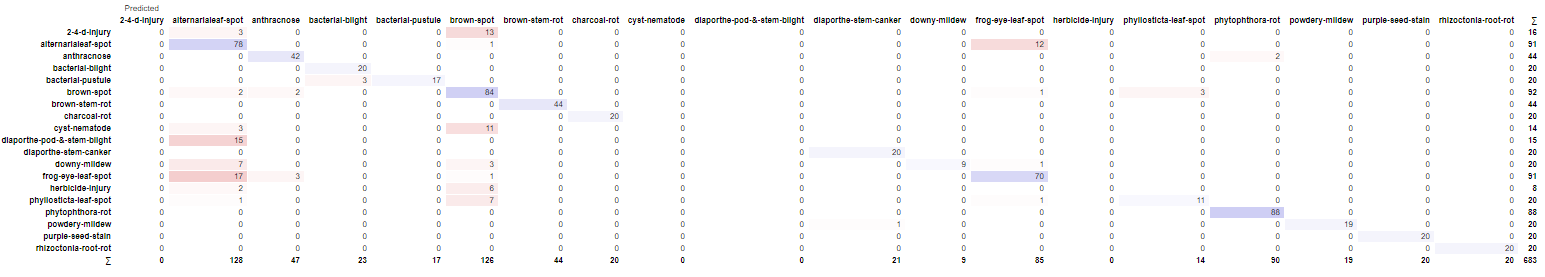

In [5]:
from IPython.display import Image, display

display(Image(filename='matriz_confusao.png'))

As classes que apresentaram 0% de acerto foram: 
- 2-4-d-injury
- cyst-nematode
- diaporthe-pod-&-stem-blight
- herbicide-injury

Essas classes ficaram com 0% de acerto por que possuem grande parte das outras features ausentes, tornando a classificação mais difícil.

As classes que apresentaram 100% de acerto foram:
- bacterial-pustule
- brown-stem-rot
- charcoal-rot
- downy-mildew
- powdery-mildew
- purple-seed-stain
- rhizoctonia-root-rot

***

#### Part B - Classification

4 - Questions

2- Considere ainda uma árvore de decisão para classificar se um indivíduo sobreviveu ou
não com base no dataset “titanic.csv”. Qual o resultado médio de acurácia e F1-score
utilizando a estratégia de validação cruzada 5-fold? Discuta os resultados.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import pandas as pd

dfTitanic = pd.read_csv('titanic.csv')

dfTitanic['Age'].fillna(dfTitanic['Age'].mean(), inplace=True)
dfTitanic['Fare'].fillna(dfTitanic['Fare'].mean(), inplace=True)
dfTitanic = pd.get_dummies(dfTitanic, columns=['Sex'], drop_first=True)
dfTitanic.rename(columns={'Sex_male': 'Male', 'Siblings/Spouses Aboard': 'SibSp', 'Parents/Children Aboard': 'Parch'}, inplace=True)

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male']
X = dfTitanic[features]
y = dfTitanic['Survived']

tree = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=5)

accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)

accuracy_scores = cross_val_score(tree, X, y, cv=cv, scoring=accuracy_scorer)
f1_scores = cross_val_score(tree, X, y, cv=cv, scoring=f1_scorer)

accuracy_mean = accuracy_scores.mean()
f1_mean = f1_scores.mean()

print(f'Acurácia média: {accuracy_mean:.4f}')
print(f'F1-score médio: {f1_mean:.4f}')

Acurácia média: 0.7836
F1-score médio: 0.6968


C:\Users\joaop\AppData\Local\Temp\ipykernel_2356\1212962846.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfTitanic['Age'] = dfTitanic['Age'].fillna(dfTitanic['Age'].mean(), inplace=True)
C:\Users\joaop\AppData\Local\Temp\ipykernel_2356\1212962846.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

A acurácia média é um pouco maior que o F1 score por se tratar de um problema desbalanceado. Existem muito mais zeros em 'Survived' e isso faz com que uma métrica de avaliação que leva em conta a proporção de previsões corretas pelo total de previsões tenha um valor maior.

...

3- Ainda considerando o dataset “titanic.csv”, construa um modelo utilizando k-NN para
prever se uma pessoa sobreviveu ou não. Considere diferentes valores de k vizinhos:
k={2,3,4,5,6,7}. Use validação cruzada 5-fold na avaliação. Houve variação significativa
nos diferentes modelos testados? Algum deles foi melhor do que a estratégia baseada
em árvore de decisão?

In [20]:
from sklearn.neighbors import KNeighborsClassifier

def evaluate_knn(k_values):
    results = {}
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracy_scores = cross_val_score(knn, X, y, cv=cv, scoring=make_scorer(accuracy_score))
        f1_scores = cross_val_score(knn, X, y, cv=cv, scoring=make_scorer(f1_score))
        results[k] = {
            'accuracy_mean': accuracy_scores.mean(),
            'f1_mean': f1_scores.mean()
        }
    return results

k_values = [2, 3, 4, 5, 6, 7]
knn_results = evaluate_knn(k_values)

print("Resultados dos modelos k-NN:")
for k, metrics in knn_results.items():
    print(f"k={k} - Acurácia média: {metrics['accuracy_mean']:.4f}, F1-score médio: {metrics['f1_mean']:.4f}")

Resultados dos modelos k-NN:
k=2 - Acurácia média: 0.6810, F1-score médio: 0.4679
k=3 - Acurácia média: 0.7047, F1-score médio: 0.5953
k=4 - Acurácia média: 0.6934, F1-score médio: 0.5031
k=5 - Acurácia média: 0.6946, F1-score médio: 0.5812
k=6 - Acurácia média: 0.6923, F1-score médio: 0.5259
k=7 - Acurácia média: 0.6890, F1-score médio: 0.5716


Entre os modelos de kNN não houve uma grande variação. Porém nenhum deles foi melhor do que a árvore de decisão. Enquanto a árvore de decisão obteve Acurácia média = 0.7791 e F1-score médio = 0.7209, o melhor modelo kNN (com k = 3) obteve Acurácia média: 0.7047 e F1-score médio: 0.5953

...

4- Avalie o resultado de uma rede neural com, pelo menos, duas camadas escondidas e
dez neurônios em cada. Use validação cruzada 5-fold na avaliação. Existe tendência de
melhora em relação às tentativas anteriores?

In [22]:
from sklearn.neural_network import MLPClassifier

neural_net = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)

accuracy_scores = cross_val_score(neural_net, X, y, cv=cv, scoring=accuracy_scorer)
f1_scores = cross_val_score(neural_net, X, y, cv=cv, scoring=f1_scorer)

accuracy_mean = accuracy_scores.mean()
f1_mean = f1_scores.mean()

print(f'Acurácia média da Rede Neural: {accuracy_mean:.4f}')
print(f'F1-score médio da Rede Neural: {f1_mean:.4f}')

Acurácia média da Rede Neural: 0.7858
F1-score médio da Rede Neural: 0.7225


Existe uma tendência de melhora com relação aos modelos anteriores. Utilizando apenas duas camadas escondidas com 10 neurônios cada, obteve-se resultados superiores aos da árvore de decisão.

---

#### Part C - Regression

1.a - Faça um modelo de regressão linear simples utilizando a variável 'KmRodado' para prever a 'PrecoVenda'

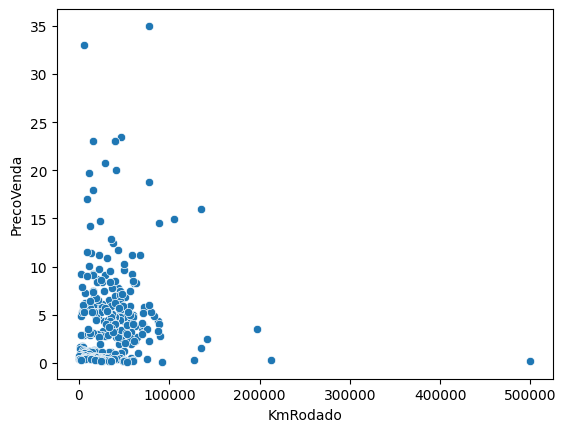

In [52]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

dfCarros = pd.read_csv('datasetCarros.csv')

X = dfCarros.loc[:,['KmRodado']]
y = dfCarros.loc[:,['PrecoVenda']]

sns.scatterplot(data = dfCarros, x='KmRodado', y='PrecoVenda')

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)

1.b - Calcule o R2 para o modelo criado.

In [53]:
from sklearn.metrics import r2_score

r2_simple = r2_score(y, y_pred)
r2_simple

0.0008518862620293666

2.c - Separe o dataset em teste (5%) e treino (95%). Use o método 'train_test_split' do
sklearn; configure o parâmetro random_state=10.

2.d - Treine um modelo de regressão linear múltipla no dataset de treino utilizando todas
as variáveis (exceto 'Nome') para prever a 'PrecoVenda' e exiba os coeficientes do
modelo

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = dfCarros.drop(columns=['Nome', 'PrecoVenda'])
y = dfCarros['PrecoVenda']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=10)

multiple = LinearRegression()
multiple.fit(X_train, y_train)

coef = pd.DataFrame(multiple.coef_, X.columns, columns=['Coefficient'])
coef

,Coefficient
Ano,3.523937e-01
PrecoAtual,-3.642461e-04
KmRodado,-5.347368e-07
Owner,-8.476162e-01
TipoCombustivel_Diesel,5.976747e+00
TipoCombustivel_Petrol,-5.275410e-01
Trasmissao_Manual,-4.599046e+00


In [64]:
import statsmodels.api as sm

X_train_np = X_train.astype(float).values
y_train_np = y_train.astype(float).values

X_train_intercept = sm.add_constant(X_train_np)

model_sm = sm.OLS(y_train_np, X_train_intercept).fit()

print_model_sm = model_sm.summary()
print(print_model_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     30.75
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           2.37e-31
Time:                        10:01:32   Log-Likelihood:                -786.11
No. Observations:                 285   AIC:                             1588.
Df Residuals:                     277   BIC:                             1617.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -701.6442    197.100     -3.560      0.0

Como esperado, os coeficientes obtidos com os diferentes métodos são os mesmos.

2.e - Avalie o modelo encontrado utilizando o dataset de teste. Calcule o R2 e MSE.

In [61]:
y_test_pred = multiple.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('R2 Score:', r2_test)
print('Mean Squared Error:', mse_test)

R2 Score: 0.6298329917862191
Mean Squared Error: 8.595268098162837
